# Credit_Card_Fraud Risk Analytics, Mitigation and Machine Learning.
Comprehensive Fraud Risk Mitigation and Data Analytics Implementation for Banking Operations <br/>
This project focuses on identifying and mitigating fraud in banking operations using advanced analytics, monitoring systems, and interactive dashboards. Leveraging tools like SQL, Python, and Power BI, the initiative aims to uncover fraudulent activities, assess risk, and automate monitoring processes to safeguard the bank's assets.



# Step 1
Data Loading, Cleaning and Preparation <br/>

**Objective:** Ensure the data is clean and ready for analysis.<br/>
**Tools:** SQL, Python (Pandas). <br/>
<br/>
**Steps:**<br/>
- Remove duplicates, handle missing values, and standardize formats using Python.<br/>
- Validate data integrity (e.g., checking transaction timestamps, account numbers).<br/>
- Load cleaned data into a structured SQL database for further querying.<br/>


In [78]:
pip show seaborn


Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install seaborn --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

In [81]:
# Load dataset
df = pd.read_csv('creditcard.csv')

In [82]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
#to view all data i df
pd.options.display.max_columns = None

In [84]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [85]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [86]:
# Find the number of observations (rows and columns)

df.shape

num_observations = df.shape[0]
print(f"Number of rows: {num_observations}")

num_observations = df.shape[1]
print(f"Number of columns: {num_observations}")

Number of rows: 284807
Number of columns: 31


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [88]:
#Checking for missing values the data set
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Step 2 
**1. Scaling the Amount Feature**<br/>

**Purpose:** Standardizes the Amount column by transforming it to have a mean of 0 and a standard deviation of 1. This is particularly useful for improving the performance of machine learning models that are sensitive to feature scaling (e.g., Logistic Regression, SVMs)..<br/>
**The Amount column now contains scaled values.**

In [89]:
from sklearn.preprocessing import StandardScaler


In [90]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [91]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**2. Dropping the "Time" Column** <br />
The Time column is removed as it is likely deemed unnecessary for the analysis or modeling.

In [92]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**3. Checking for and Removing Duplicates** <br />
* df.duplicated().any(): Checks if there are duplicate rows in the dataset. <br />
* df = data.drop_duplicates(): Removes duplicate rows from the dataset. <br />
* df.shape: Reports the new dataset size after removing duplicates. <br />
* Output: The dataset is reduced to 275,663 rows and 30 columns.

In [93]:
df.duplicated().any()

True

In [94]:
df = df.drop_duplicates()

In [95]:
# Find the number of observations (rows and columns)

df.shape

num_observations = df.shape[0]
print(f"Number of rows: {num_observations}")

num_observations = df.shape[1]
print(f"Number of columns: {num_observations}")

Number of rows: 275663
Number of columns: 30


**4. Checking Imbalance or balnace data**<br />
* df['Class'].value_counts(): Displays the distribution of the target class (Class)<br />
0 (legitimate transactions): 275,190 occurrences<br />
1 (fraudulent transactions): 473 occurrences<br />
**Observation: The dataset is highly imbalanced, with fraudulent transactions making up only 0.17% of the dataset.**
<br />
* sns.countplot(data['Class']): Visualizes the class distribution using a bar plot.
Result: A clear visual representation of the class imbalance.

In [96]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

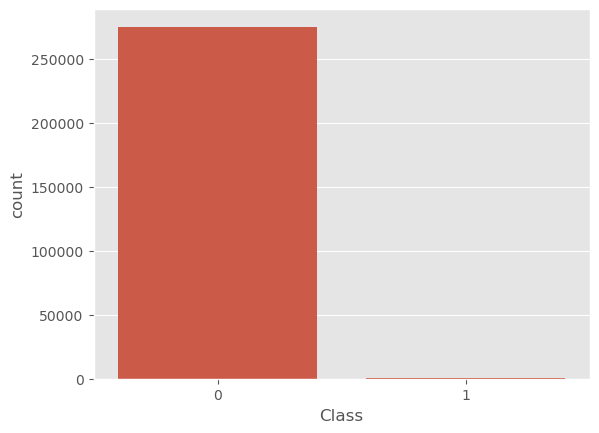

In [97]:
plt.style.use('ggplot')
sns.countplot(x='Class', data=df)
plt.show()


**5. Splitting Features and Labels**<br />
* X: Contains all features except the target (Class).
* y: The target column (Class) used for predicting fraud.

In [98]:
X = df.drop('Class', axis=1)
y = df['Class']

**6. Splitting the Data into Training and Testing Sets**<br />
* Splits the dataset into:<br />
  1. Training set (80% of the data): Used to train the model.<br />
  2. Testing set (20% of the data): Used to evaluate model performance.<br />
* random_state=42: Ensures reproducibility of results by fixing the randomness.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**7. Classifiers Initialization**<br />
* LogisticRegression(): A linear classifier that predicts probabilities for binary classification tasks.
* DecisionTreeClassifier(): A non-linear classifier that splits the data into nodes based on feature conditions.

In [100]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

**8. Training, Evaluation & Metrics Calculation**<br />
* fit(X_train, y_train): The model learns from the training data.
* predict(X_test): The model predicts labels for the test set.
* y_pred: Predictions made by the model.


In [101]:
for name, clf in classifier.items():
    try:
        print(f"\n=========={name}===========")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"\n Precision: {precision_score(y_test, y_pred)}")
        print(f"\n Recall: {recall_score(y_test, y_pred)}")
        print(f"\n F1 Score: {f1_score(y_test, y_pred)}")
    except Exception as e:
        print(f"Error with {name}: {e}")




==========Logistic Regression===========

 Accuracy: 0.9992563437505668

 Precision: 0.890625

 Recall: 0.6263736263736264

 F1 Score: 0.7354838709677419

==========Decision Tree Classifier===========

 Accuracy: 0.9988573086898953

 Precision: 0.6320754716981132

 Recall: 0.7362637362637363

 F1 Score: 0.6802030456852792


# STEP 3

**Under Sampling of the Minority Class**
*  Undersampling balances the dataset by reducing the size of the majority class to match the minority class. It helps address the imbalance and prevents the model from being biased toward the majority class.

**1. Separate the Classes**

* normal: Subset of data where the Class column equals 0 (non-fraud transactions).
* fraud: Subset of data where the Class column equals 1 (fraudulent transactions).

In [102]:
# Checking the Class Distribution
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [103]:
normal.shape

(275190, 30)

In [104]:
fraud.shape

(473, 30)

**2. Undersample the Majority Class**
* normal.sample(n=473): Randomly selects 473 rows from the normal class to match the number of rows in the fraud class.
* Why? To create a balanced dataset where both classes have equal representation.

In [105]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

**3. Combine the Classes into a New Dataset**
* pd.concat: Combines the undersampled majority class (normal_sample) and the minority class (fraud) into a single DataFrame, new_data.
* ignore_index=True: Resets the row indices for the combined dataset to maintain continuity.

In [106]:
new_df = pd.concat([normal_sample, fraud], ignore_index=True)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.899370,0.948336,1.351589,-0.412735,0.770897,1.469379,0.319661,0.659477,-0.550224,-0.045354,2.355951,1.255204,0.319537,0.298670,1.206759,-0.907340,0.522647,-1.869024,-1.278240,0.123618,-0.084959,0.031040,0.134235,-1.029890,-0.463286,0.187035,0.449710,0.152414,-0.303773,0
1,2.061287,0.258150,-2.330220,0.408389,0.592936,-1.552960,0.662884,-0.422345,-0.107810,-0.171372,1.296743,0.640964,-0.489236,-0.415831,-0.892946,-0.072731,0.672555,0.218072,0.233154,-0.203958,0.084006,0.415923,-0.045384,0.058093,0.304075,0.803197,-0.112136,-0.068995,-0.337517,0
2,-1.378503,-0.354806,2.665691,-1.016387,0.218326,0.001238,0.370690,-0.117546,0.804467,-0.315427,0.613318,0.694480,-0.144541,-1.035880,-1.448977,0.160331,-0.676690,-0.000827,0.405894,0.193852,-0.314236,-0.255689,0.076132,0.053170,0.273176,0.826469,-0.192465,-0.348188,-0.214656,0
3,-1.445561,0.112434,1.240895,1.172598,0.019078,0.680232,-0.283754,0.721065,0.278888,-0.669884,-1.901066,-0.330036,-0.842041,0.052739,0.025806,-0.632099,0.494761,-0.028923,0.828694,-0.101204,0.086891,0.290325,-0.128348,-0.757021,0.135988,-0.144394,-0.052086,0.025150,-0.093914,0
4,2.169845,-0.794714,-1.133921,-1.230105,-0.237028,-0.068313,-0.664250,-0.031541,-0.632499,0.894514,0.686066,0.417722,0.931433,-0.137416,-0.404822,1.543735,-0.403501,-1.221126,1.288061,0.098249,-0.235531,-0.818557,0.411159,0.047170,-0.464367,-0.706682,-0.020513,-0.049476,-0.248000,0


**4. Checking Imbalance or balnace data**

In [107]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

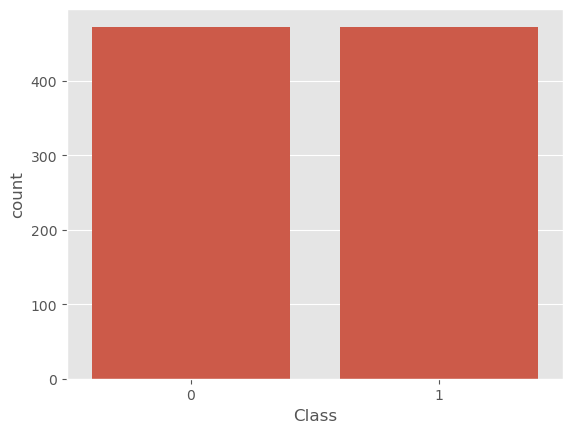

In [108]:
plt.style.use('ggplot')
sns.countplot(x='Class', data=new_df)  # Explicitly specify x and data
plt.show()

**5. Splitting Features and Labels**<br />
* X: Contains all features except the target (Class).
* y: The target column (Class) used for predicting fraud.

In [109]:
X = new_df.drop('Class', axis = 1)
y= new_df['Class']

**6. Classifiers Initialization & Training, Evaluation & Metrics Calculation**

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [111]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    try:
        print(f"\n=========={name}===========")
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"\n Precision: {precision_score(y_test, y_pred)}")
        print(f"\n Recall: {recall_score(y_test, y_pred)}")
        print(f"\n F1 Score: {f1_score(y_test, y_pred)}")
    except Exception as e:
        print(f"Error with {name}: {e}")


==========Logistic Regression===========

 Accuracy: 0.9263157894736842

 Precision: 0.9489795918367347

 Recall: 0.9117647058823529

 F1 Score: 0.93

==========Decision Tree Classifier===========

 Accuracy: 0.9052631578947369

 Precision: 0.9117647058823529

 Recall: 0.9117647058823529

 F1 Score: 0.9117647058823529


# STEP 4

**OVERSAMPLING**<BR /> 
* We adopt oversampling using SMOTE (Synthetic Minority Oversampling Technique) to address class imbalance in the dataset. <br />
* It then evaluates the performance of two machine learning modelswhich are Logistic Regression and Decision Tree Classifier. 

**1. Separate Features and Target**

In [112]:
X = df.drop('Class', axis=1)
y = df['Class']

In [113]:
X.shape

(275663, 29)

In [114]:
y.shape

(275663,)

**2. Apply SMOTE**
* SMOTE(): A technique to balance the dataset by generating synthetic samples for the minority class.
* fit_resample(X, y): Resamples the dataset so that the two classes have equal representation.

In [115]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)

**3.  Verify Class Distribution**
* Confirms the dataset is now balanced, with 275,190 samples for both classes (Class=0 and Class=1).

In [116]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

**4. Train-Test Split**
* Splits the balanced dataset into training and testing sets:<br />
   _80% for training (X_train, y_train).<br />
   _20% for testing (X_test, y_test).
* random_state=42: Ensures reproducibility.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


# STEP 5

**Training and Evaluation Of the Model**

**1. Define Classifiers**<br />
<br />
Defines two machine learning models: <br />
* Logistic Regression: A linear model for binary classification.
* Decision Tree Classifier: A tree-based model that splits data into branches based on feature values.


In [118]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}


**2. Train and Evaluate Models** <br />
<br />
Loops through each classifier:<br />
* clf.fit(X_train, y_train): Trains the model on the training set.
* clf.predict(X_test): Predicts labels for the test set.<br />
<br />
Evaluation Metrics:<br />
* Accuracy: Overall correctness of predictions.
* Precision: Fraction of true positives among predicted positives.
* Recall: Fraction of true positives among actual positives.
* F1 Score: Harmonic mean of precision and recall.

In [119]:
for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")



==========Logistic Regression===========

 Accuracy: 0.9447290962607653

 Precision: 0.9730038096343138

 Recall: 0.9147682853662528

 F1 Score: 0.9429877991641209

==========Decision Tree Classifier===========

 Accuracy: 0.9983011737345107

 Precision: 0.9975312227708394

 Recall: 0.999072777848481

 F1 Score: 0.9983014052011517


# STEP 6

**We have to save, load, and use a trained machine learning model for predicting credit card transactions (fraud or normal) and outlines potential next steps using frameworks like Flask or Streamlit for deployment.**

**1. Train Decision Tree on Entire Balanced Dataset**

* dtc.fit(X_res, y_res): Trains the Decision Tree Classifier on the entire balanced dataset (X_res, y_res), ensuring it learns from all oversampled data.

In [120]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)


DecisionTreeClassifier()

**2. Saving the Model**<br />
* joblib.dump(dtc, "credit_card_fraud_model.pkl"):<br />
    - Saves the trained Decision Tree Classifier (dtc) to a file named credit_card_model.pkl.<br />
    - Purpose: Persist the model so it can be reused without retraining.

In [122]:
import joblib

In [123]:
joblib.dump(dtc, "credit_card_fraud_model.pkl")

['credit_card_fraud_model.pkl']

**3. Load Model**<br />
* joblib.load("credit_card_fraud_model.pkl"):<br />
    -  Loads the saved model from credit_card_model.pkl into memory as model.<br />
    -   Purpose: Use the pre-trained model for predictions.

In [124]:
model = joblib.load("credit_card_fraud_model.pkl")

**4. Make Predictions Using**<br />
* model.predict():<br />
    -  Takes a list of feature values as input to predict the class label (normal or fraud).<br />
    -  The provided list represents a single transaction with 29 features (excluding the Class label).

In [125]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [126]:
pred[0]

0

**The result of the prediction:<br />**
* 0 : Normal transaction. <br />
* 1 : Fraudulent transaction.

**5. Displaying the Result** <br />
* **Conditions:** <br />
    -  If the predicted class is 0, it prints "Normal Transaction."<br />
    -  Otherwise, it prints "Fraud Transaction."

In [127]:
if pred[0] == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")


Normal Transaction


# STEP 7
**DEPLOYMENT ON FLASK & STEAMLIT APPLICATION**

**1. Install Flask API** <br />
Flask is ideal for creating a backend API for your model.

In [128]:
pip install flask


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**2. Folder Setup - Create a project folder app.py**